In [29]:
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
import numpy as np
import matplotlib.pyplot as plt

### Télécharger la structure de bande du matériau attribué: TiCoSb

In [33]:
#pour télécharger le ﬁchier CIF du matériau
with MPRester("CfP3t0zy6KRi8xvk") as m:
    # Structure for material id mp-5967
    struct = m.get_structure_by_material_id("mp-5967")

### Déterminer la bande interdite

In [34]:
#print(bandstruct.get_band_gap())
if (bandstruct.get_band_gap()['direct'] == True) : 
    print("La bande interdite est directe.")
if (bandstruct.get_band_gap()['direct']==False):
    print("La bande interdite est indirecte.")
energy=bandstruct.get_band_gap()['energy']
transition=bandstruct.get_band_gap()['transition']
print("La valeur du gap énergétique est de : {} eV.".format(energy))
print("Le matériau est donc un isolant.")
print("La transition a lieu en {}".format(transition))

La bande interdite est indirecte.
La valeur du gap énergétique est de : 1.0431999999999997 eV.
Le matériau est donc un isolant.
La transition a lieu en \Gamma-X


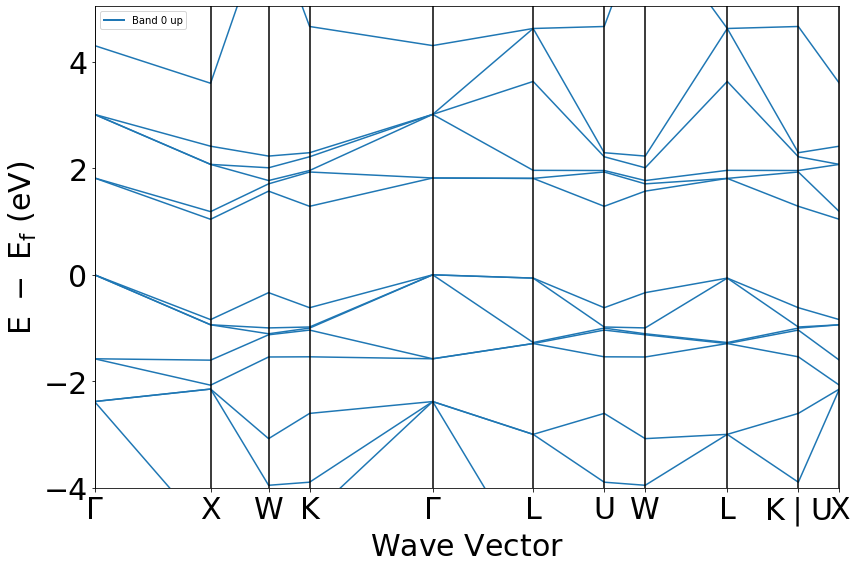

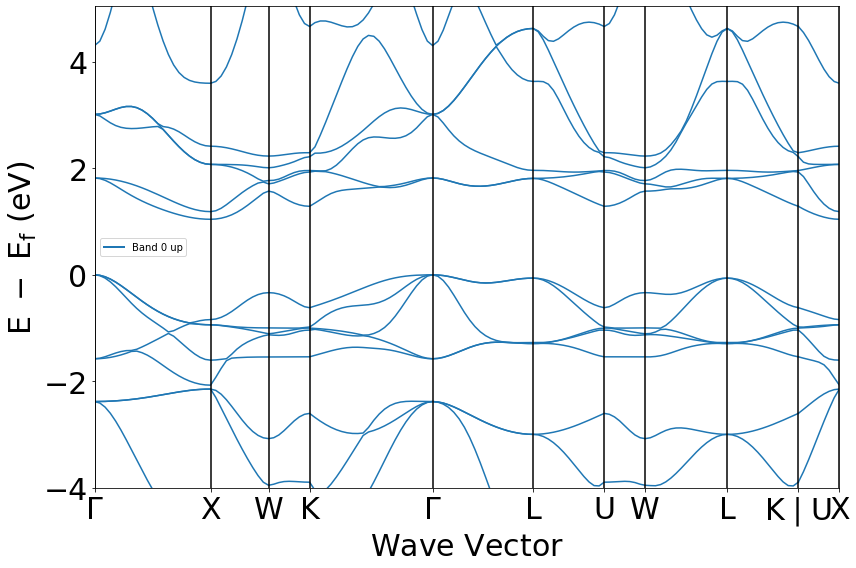

In [35]:
plot1 = BSPlotter(bandstruct)
plot1.get_plot(smooth = True,smooth_np = 2)
plot1.show()

### Représentation de la zone de Brillouin

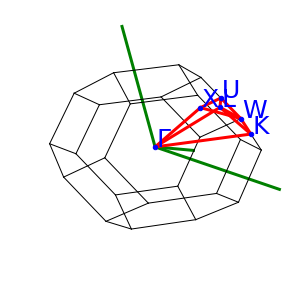

In [36]:
BSPlotter(bandstruct).plot_brillouin()

### Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion 

In [37]:
data = plot1.bs_plot_data()
distance = data.get('distances')

    
val_delta = []
for i in range (len(data['energy'][str(Spin.up)])):
    val_delta.append(data['energy'][str(Spin.up)][i][10][-1]-data['energy'][str(Spin.up)][i][10][0])

#print(val_delta)
    
val_disp = []
for i in range(len(data['distances'])):
    val_disp.append(abs(val_delta[i]/(distance[i][-1]-distance[i][0])))

maxval_disp=max(val_disp)
minval_disp=min(val_disp)

#print(val_disp)
#print(maxval_disp)
#print(minval_disp)

cond_delta = []
for i in range (len(data['energy'][str(Spin.up)])):
    cond_delta.append(data['energy'][str(Spin.up)][i][11][-1]-data['energy'][str(Spin.up)][i][11][0])
    
#print(val_delta)
    
cond_disp = []
for i in range(len(data['distances'])):
    cond_disp.append(abs(cond_delta[i]/(distance[i][-1]-distance[i][0])))

maxcond_disp=max(cond_disp)
mincond_disp=min(cond_disp)

#print(cond_disp)
#print(maxcond_disp)
#print(mincond_disp)
    
dist = []
for i in range(len(data['distances'])):
    dist.append(data['distances'][i][-1]-data['distances'][i][0])

#print(dist)

#### Dispersion maximale

In [38]:
print("La pente maximale dans la bande de valence vaut", maxval_disp," dans la",val_disp.index(maxval_disp)+1,"ère direction")
print("La pente maximale dans la bande de conduction vaut", maxcond_disp, "dans la",cond_disp.index(maxcond_disp)+1,"ère direction")

La pente maximale dans la bande de valence vaut 1.4073534872108502  dans la 6 ère direction
La pente maximale dans la bande de conduction vaut 0.9501830660919839 dans la 2 ère direction


#### Dispersion maximale

In [39]:
print("La pente minimale dans la bande de valence vaut", minval_disp, "dans la",val_disp.index(minval_disp)+1,"ème direction")      
print("La pente minimale dans la bande de conduction vaut", mincond_disp, "dans la",cond_disp.index(mincond_disp)+1,"ème direction")

La pente minimale dans la bande de valence vaut 0.045101579940130795 dans la 7 ème direction
La pente minimale dans la bande de conduction vaut 0.06682706278881888 dans la 5 ème direction


In [40]:
vbm = bandstruct.get_vbm()
E_vbm = vbm['energy']
kpoint_vbm = vbm['kpoint'].cart_coords

cbm = bandstruct.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords



h_bar = 6.5821e-16
m_electron = 9.11e-31
m_vbm = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*abs(E_vbm))
m_cbm = (h_bar**2 * (kpoint_cbm[0]**2+kpoint_cbm[1]**2+kpoint_cbm[2]**2))/(2*E_cbm)
print('La masse effective au sommet de la dernière bande de valence =', m_vbm, 'kg', '=',  m_vbm/m_electron, 'm_e')
print('La masse effective à la base de la première bande de conduction =', m_cbm, 'kg')

La masse effective au sommet de la dernière bande de valence = 0.0 kg = 0.0 m_e
La masse effective à la base de la première bande de conduction = 2.965118706674097e-32 kg
